In [2]:
# import os
# import urllib.request
# import zipfile
# glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'
# glove_dir = './glove_data'
# glove_file = os.path.join(glove_dir, 'glove.6B.100d.txt')

# if not os.path.exists(glove_file):
#     os.makedirs(glove_dir, exist_ok=True)
#     zip_path = os.path.join(glove_dir, 'glove.6B.zip')
#     urllib.request.urlretrieve(glove_url, zip_path)
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(glove_dir)
#     print("다운로드 완료!")

In [3]:
import gensim.downloader as api
import numpy as np
# Glove 모델 (50차원)
wv = api.load('glove-wiki-gigaword-50')

In [4]:
# 데이터셋에 사용된 단어들을 GloVe가 이밎 학습한 벡터로 연결해서 Embedding Laye 의 가중치 초기값으로 사용하기 위해 Embedding_matrix를 만드는 것.

In [5]:
wv['king'].shape # 모델에 사용한 Tokenizer를 잘 이해해야한다. / 단어간의 의미를 잘 이해 시켜 딥러닝 데이터를 학습해서 쓸꺼다.

(50,)

In [8]:
# nltk 데이터로드
import random
import tensorflow as tf
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/kangminji/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


매칭 : 9722 비매칭 : 277
커버리지 : 0.9722972297229723
Epoch 1/100


/Users/kangminji/LLM/.venv/lib/python3.13/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - acc: 0.5156 - loss: 0.7800 - val_acc: 0.5437 - val_loss: 0.7235
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - acc: 0.4781 - loss: 0.7432 - val_acc: 0.4563 - val_loss: 0.7463
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.5750 - loss: 0.6721 - val_acc: 0.5437 - val_loss: 0.6989
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.5367 - loss: 0.6767 - val_acc: 0.4563 - val_loss: 0.7152
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.5469 - loss: 0.6485 - val_acc: 0.5875 - val_loss: 0.6857
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - acc: 0.7164 - loss: 0.6329 - val_acc: 0.6031 - val_loss: 0.6840
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.7484 - loss: 0.6194 - val_acc: 0.5156 - val_loss: 0.6899
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - acc: 0.9531 - loss: 0.5953 - val_acc: 0.6094 - val_loss: 0.6770
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - acc: 0.8852 - loss: 0.5

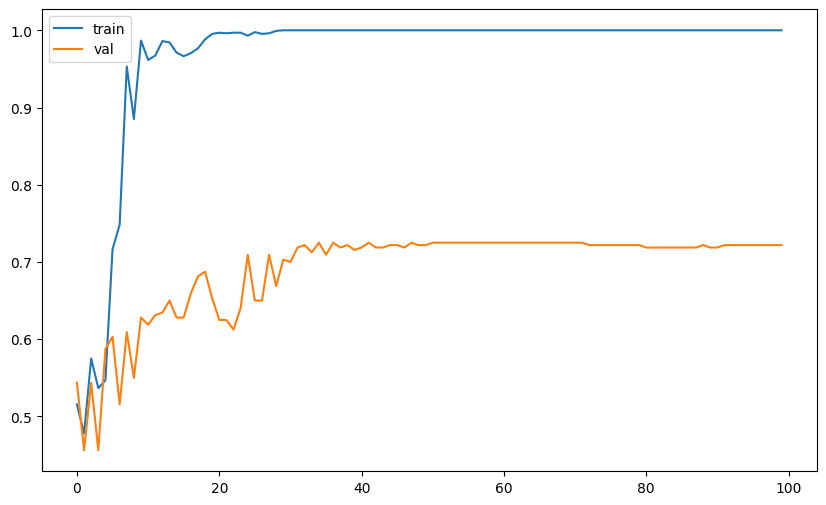

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7500 - loss: 0.6984
test loss : 0.698403537273407  test acc : 0.75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.11331051],
       [0.6325908 ]], dtype=float32)

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  # 단어를 단어사전, 단어를 숫자로 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences  #길이 맞추기 


# 재현성 시드 고정
import random
import tensorflow as tf
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)


# 데이터로딩
ids = movie_reviews.fileids()
reviews = [movie_reviews.raw(id) for id in ids]
categories = [ movie_reviews.categories(id)[0] for id in ids]

# 하이퍼파라메터
max_words = 10000 # 최대단어수
maxlen = 500 # 문서길이
embed_dim = 50 # 임베딩차원
batch_size = 256 # batch_size
epochs = 15 # epoch

# 토큰화 + 시퀀스변화 + 패딩
tokenizer = Tokenizer(num_words=max_words,oov_token='UNK')
tokenizer.fit_on_texts(reviews)
x = tokenizer.texts_to_sequences(reviews)
x = pad_sequences(x,maxlen=maxlen,truncating='post')

# 라벨인코딩
label_map = {'pos':0,'neg':1}
y = np.array([label_map.get(c) for c in categories])
# train/test 분할
from sklearn.model_selection import train_test_split
import numpy as np
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42, test_size=0.2)

# 임베딩 매트릭스 초기화
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index)+1)
embedding_matrix = np.random.normal(
    loc = 0.0, scale=0.1,size =(num_words, embed_dim)
)

# glove 매칭
hits = 0
misses = 0
for word, i in word_index.items():
    if i >= max_words:
        continue
    try:
        embedding_vector = wv[word]      # GloVe에서 단어 벡터 찾기
        embedding_matrix[i] = embedding_vector  # 해당 위치에 저장
        hits += 1
    except KeyError:
        misses += 1
print(f'매칭 : {hits} 비매칭 : {misses}')        
print(f'커버리지 : {hits / (hits+misses)}')

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,output_dim=embed_dim,input_length=maxlen,
                              weights=[embedding_matrix] ),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPool1D(),  # 시퀀스의 구간별 특징 요약
    tf.keras.layers.Conv1D(256,3,activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),  # 전체시퀀스의 평균  시퀀스차원없애고 채널 축만남김(채널에대한평균)    
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
# 컴파일
adam =  tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['acc'])
# 콜백(선택)
import tensorflow as  tf
es = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# 학습
history = model.fit(
    x_train,y_train,epochs=100,batch_size=batch_size,validation_split = 0.2
    # ,callbacks=[es]
)

# 학습결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(history.history['acc'],label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend()
plt.show()
# 테스트 평가
test_loss,  test_acc =  model.evaluate(x_test,y_test)
print(f'test loss : {test_loss}  test acc : {test_acc}')

# 임의의 데이터로 예측
sample_texts = [
    "This movie was absolutely fantastic and inspiring",
    "I really disliked the plot and the acting was terrible"
]
x_sample = tokenizer.texts_to_sequences(sample_texts)
x_sample = pad_sequences(x_sample,maxlen=maxlen,truncating='post')
x_sample_predict = model.predict(x_sample)
x_sample_predict